In [ ]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import math, time, datetime
# from math import sqrt
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pyplot as plt
from matplotlib import colors
import missingno as msno
%matplotlib inline

from sklearn.model_selection import (train_test_split, GridSearchCV, cross_val_score)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, scale
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
# Load training and test data
df_first = pd.read_csv('/content/train.csv')
df_test_first = pd.read_csv('/content/train.csv')
df_gender_sub= pd.read_csv('/content/gender_submission.csv')

In [ ]:
df_first

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_test_first

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_gender_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


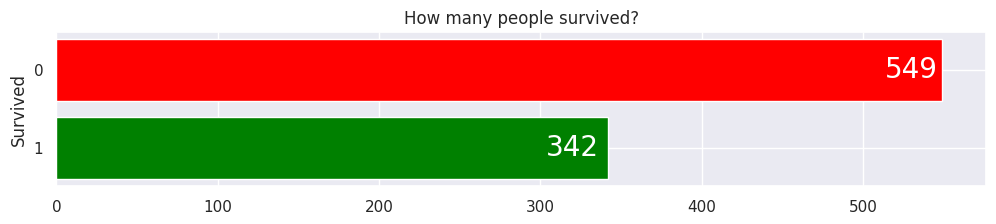

In [ ]:
fig, ax = plt.subplots(figsize = (12, 2))
ax.barh(df_first['Survived'].unique(), df_first['Survived'].value_counts(), align='center', color=['red', 'green'])
ax.text(530, 0, df_first['Survived'].value_counts()[0], ha='center', va='center', color='w', size=20)
ax.text(320, 1, df_first['Survived'].value_counts()[1], ha='center', va='center', color='w', size=20)
ax.set_yticks(df_first['Survived'].unique())
ax.set_yticklabels(df_first['Survived'].unique())
ax.invert_yaxis()
ax.set_ylabel('Survived')
ax.set_title('How many people survived?')

plt.show()

In [ ]:
df_first.info()
print("----------------------------")
df_test_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-

<Axes: >

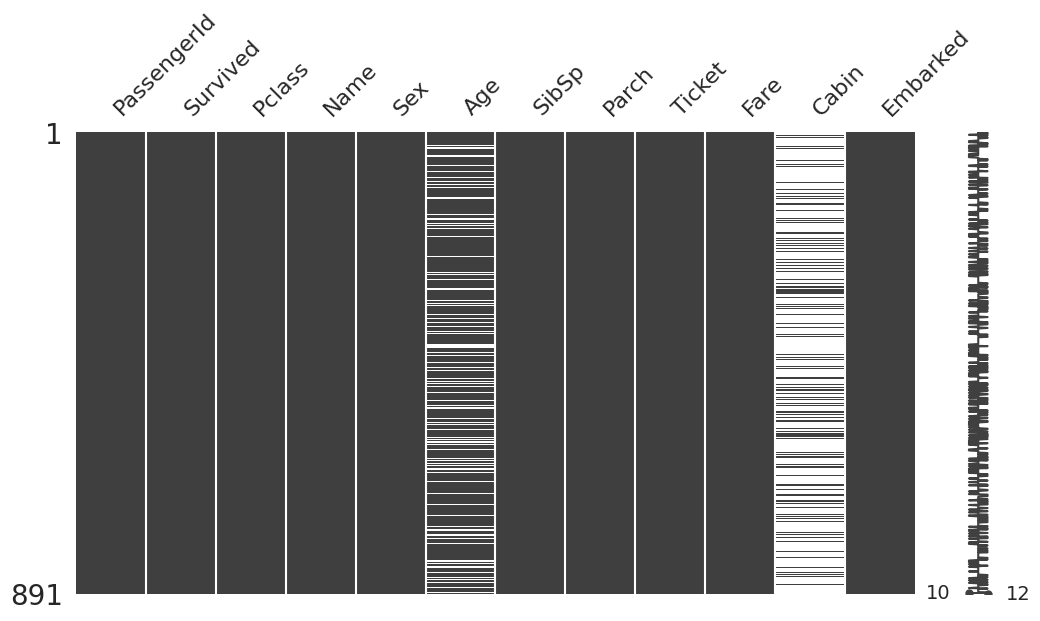

In [ ]:
## plot graphic of missing values
msno.matrix(df_first, figsize=(12, 6))


<Axes: >

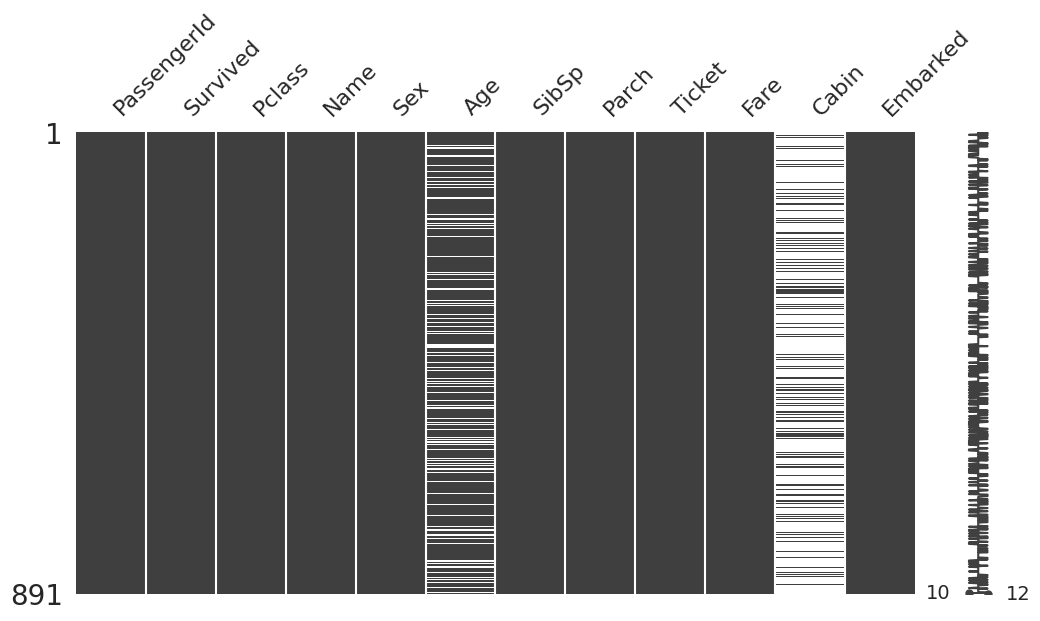

In [ ]:
# plot graphic of missing values
msno.matrix(df_test_first, figsize=(12, 6))

In [ ]:
# drop unnecessary columns, which won't be used in analysis and prediction
df = df_first.drop(['PassengerId','Name','Ticket', 'Cabin'], axis=1)
df_test = df_test_first.drop(['PassengerId','Name','Ticket', 'Cabin'], axis=1)

In [ ]:
# Checking for missing values in train data
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
# Step 2: Data Preprocessing

# Handling missing values
df_first['Age'].fillna(df_first['Age'].median(), inplace=True)
df_first['Embarked'].fillna(df_first['Embarked'].mode()[0], inplace=True)

# Dropping columns that are not useful for prediction
df_first.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Convert categorical variables into dummy/indicator variables
df_first = pd.get_dummies(df_first, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
# Step 3: Prepare features and target variable
X = df_first.drop('Survived', axis=1)
y = df_first ['Survived']

In [ ]:
# Step 4: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Step 6: Make predictions on the validation set
y_pred = model.predict(X_val)

In [ ]:
# Step 7: Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


In [ ]:
# Step 8: Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

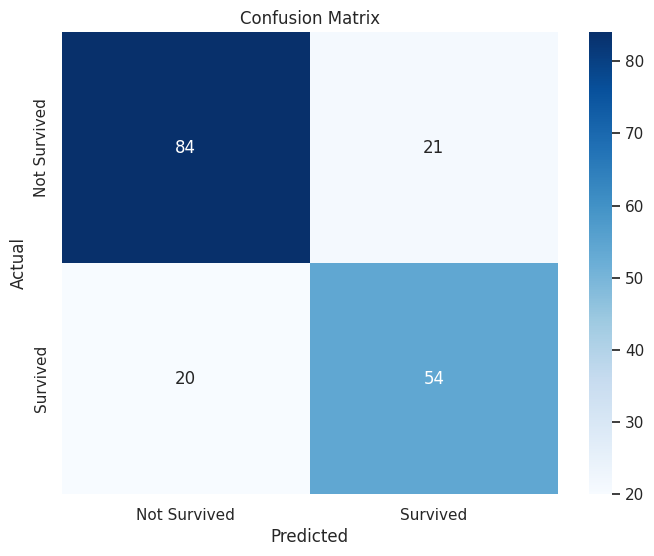

In [ ]:
# Step 9: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Step 10: Classification report
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.7709
Confusion Matrix:
 [[84 21]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       105
           1       0.72      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



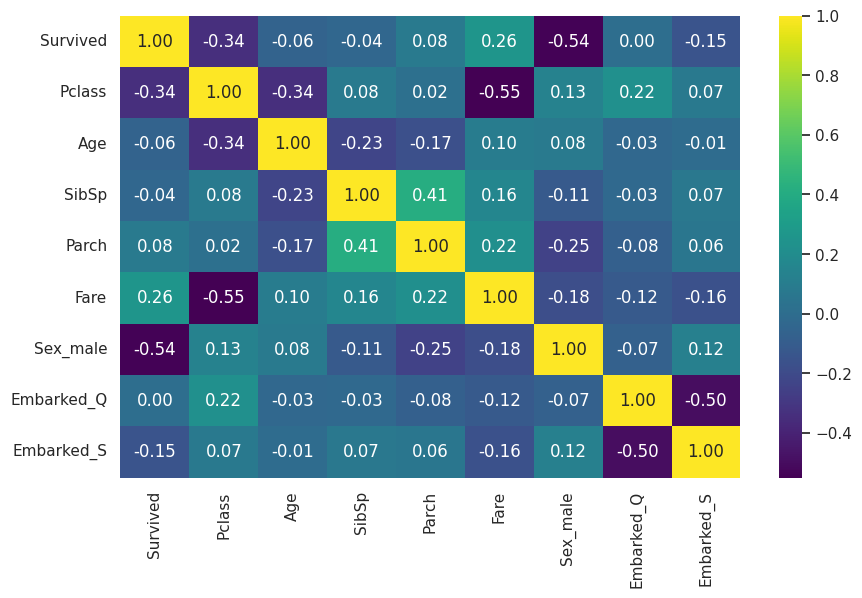

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_heatmap(data, figsize=(10, 6)):
    """
    Creates a heatmap using seaborn.

    Args:
        data: The data to plot in the heatmap.
        figsize: The size of the figure.
    """
    plt.figure(figsize=figsize)
    sns.heatmap(data, annot=True, cmap='viridis', fmt=".2f")
    plt.show()

# Assuming df_first is your DataFrame
hm_X_train = df_first.corr()
create_heatmap(hm_X_train, figsize=(10, 6))

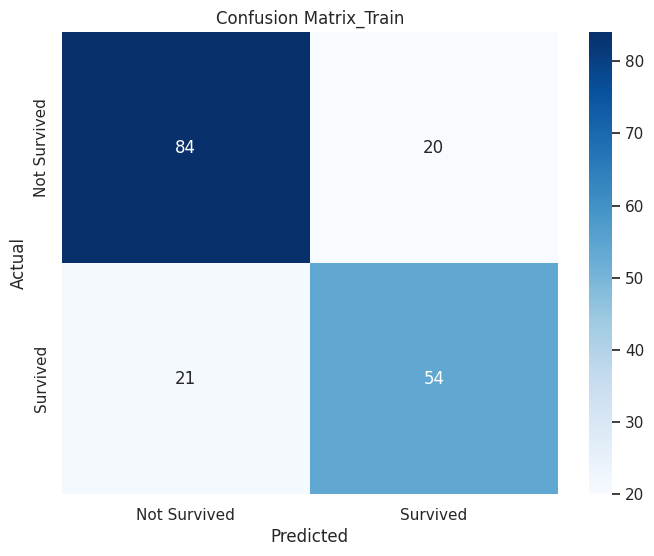

In [ ]:
!pip install matplotlib seaborn scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_val and y_pred are defined and contain the true and predicted values
cm = confusion_matrix(y_val, y_pred).T

# Use seaborn to create the confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix_Train")
plt.show()

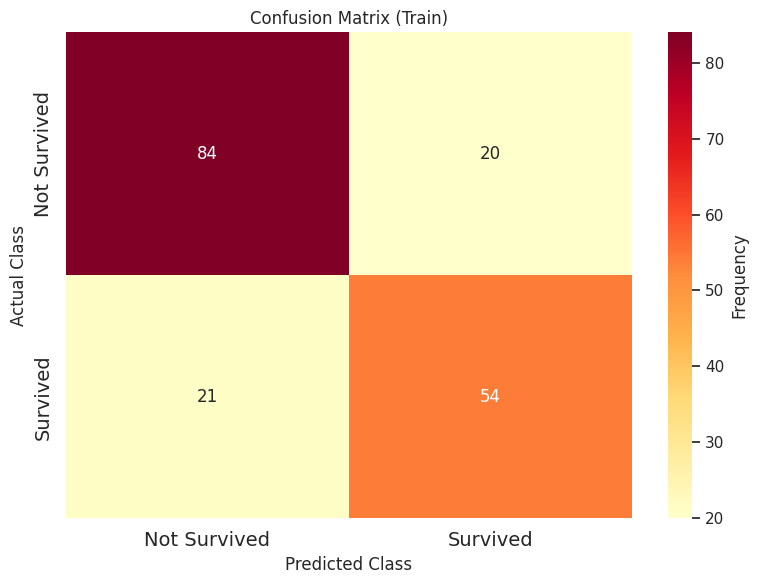

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming `y_val` and `y_pred` are NumPy arrays containing true and predicted values
cm = confusion_matrix(y_val, y_pred).T  # Transpose for better visualization

# Create a professional-looking confusion matrix plot with customization options
fig, ax = plt.subplots(figsize=(8, 6))  # Create figure and axis objects

# Set background color and colormap for a clear and informative visualization
sns.heatmap(cm, annot=True, fmt='g', cmap='YlOrRd',  # Use YlOrRd for professional orange-red
            ax=ax,  # Specify axis for heatmap
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'],
            cbar_kws={'label': 'Frequency'})  # Add colorbar label with informative label

# Customize labels and title for clarity and context
ax.set_ylabel('Actual Class')
ax.set_xlabel('Predicted Class')
ax.set_title("Confusion Matrix (Train)")  # Use parentheses for consistency

# Adjust font sizes and other visual elements for improved readability
plt.tick_params(labelsize=14)  # Adjust tick label size
ax.tick_params(bottom=False)  # Remove bottom x-axis ticks for cleaner look

# Optional: Add gridlines for better visual separation (uncomment if desired)
# ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()  # Adjust spacing for better layout
plt.show()

In [ ]:
# Select relevant features
features = ['Sex', 'Embarked']
X = df_first[features]
y = df_first['Survived']

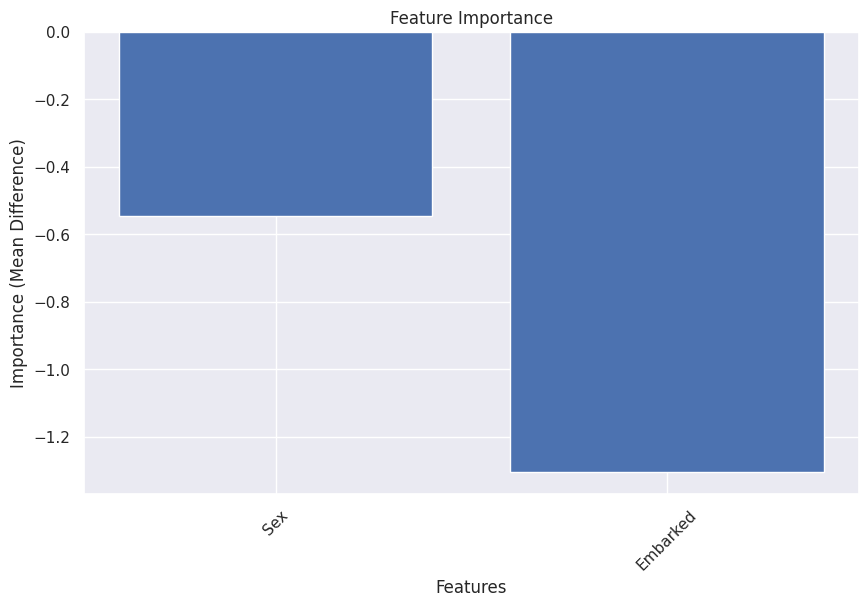

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy and alias it as np


# Feature Importance
importance = model.theta_[1] - model.theta_[0]  # Assuming this gives importance for each feature
features_names = np.array(features)

# Ensure importance has the same length as features
importance = importance[:len(features)]  # Truncate if necessary

indices = np.argsort(importance)[::-1]  # Get indices for sorting in descending order

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), importance[indices], align='center')  # Use importance[indices] for sorted values
plt.xticks(range(len(features)), features_names[indices], rotation=45)  # Use features_names[indices] for sorted labels
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance (Mean Difference)')
plt.show()